In [2049]:
import h5py

dataPath = "data-15.07.08/8.20//000029.SZtick.mat"
f = h5py.File(dataPath,'r+')

In [2050]:
f['r1'].keys()

<KeysViewHDF5 ['AccTurover', 'AccVolume', 'AskAvPrice', 'AskPrice', 'AskVolume', 'BSFlag', 'BidAvPrice', 'BidPrice', 'BidVolume', 'Code', 'CurDelta', 'Date', 'Downs', 'High', 'HoldLines', 'Index', 'Interest', 'Low', 'MatchItems', 'Open', 'Position', 'PreClose', 'PrePosition', 'PreSettle', 'Price', 'Settle', 'Stocks', 'Time', 'TotalAskVolume', 'TotalBidVolume', 'TradeFlag', 'Turover', 'Ups', 'Volume', 'WindCode']>

In [2051]:
import numpy as np
import pandas as pd
keys = ['AccTurover', 'AccVolume', 'AskAvPrice', 'AskPrice', 'AskVolume', 'BSFlag', 'BidAvPrice', 'BidPrice', 'BidVolume', 'Code', 'CurDelta', 'Date', 'Downs', 'High', 'HoldLines', 'Index', 'Interest', 'Low', 'MatchItems', 'Open', 'Position', 'PreClose', 'PrePosition', 'PreSettle', 'Price', 'Settle', 'Stocks', 'Time', 'TotalAskVolume', 'TotalBidVolume', 'TradeFlag', 'Turover', 'Ups', 'Volume', 'WindCode']
data = []
for key in keys:
    data.append(f['r1'][key])

In [2052]:
BidPrice = np.array(f['r1']['BidPrice'])
AskPrice = np.array(f['r1']['AskPrice'])
BidVolume = np.array(f['r1']['BidVolume'])
AskVolume = np.array(f['r1']['AskVolume'])
TotalBidVolume = np.array(f['r1']['TotalBidVolume'])## 添加于2.12.16.55
TotalAskVolume = np.array(f['r1']['TotalAskVolume'])
Price = np.array(f['r1']['Price']) 
miu_n = BidVolume.astype(np.int) - AskVolume.astype(np.int)
Total_miu_n = TotalBidVolume.astype(np.int) - TotalAskVolume.astype(np.int) 
miu_n

C:\Users\86157\AppData\Local\Temp\ipykernel_22096\2270436373.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  miu_n = BidVolume.astype(np.int) - AskVolume.astype(np.int)
C:\Users\86157\AppData\Local\Temp\ipykernel_22096\2270436373.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

array([[      0,       0,       0, ...,       0, -579500, -579500],
       [  -1100,    -100,    -100, ..., -579500,  -18100,  -18100],
       [      0,       0,       0, ...,       0,  -18237,  -18237],
       ...,
       [      0,       0,       0, ...,       0,   -3800,   -3800],
       [      0,       0,       0, ...,       0,   -5500,   -5500],
       [      0,       0,       0, ...,       0,   -9200,   -9200]])

In [2053]:
Total_miu_n

array([[       0,        0,        0, ...,        0, -6916315, -6916315]])

In [2054]:
Price

array([[ 0.  ,  0.  ,  0.  , ..., 12.96, 12.96, 12.96]])

In [2055]:
miu_n_tmp = miu_n[0:1,:]
miu_n_final = np.sum(miu_n_tmp,axis=0)

In [2056]:
miu_n_final

array([      0,       0,       0, ...,       0, -579500, -579500])

In [2057]:
S_n = BidPrice[0] + AskPrice[0]
S_n = S_n / 2
for i in range(S_n.shape[0]):
    if i+5 < S_n.shape[0]:          ## 修改于2.12.16.55： i+1 -> i+5
        S_n[i] = S_n[i+5] - S_n[i]  ## 修改于2.12.16.55： i+1 -> i+5
indexes = []
for i in range(S_n.shape[0]):
    if 1000 > S_n[i] > -1000:
        indexes.append(i)

Text(0.5, 0, 'miu_n')

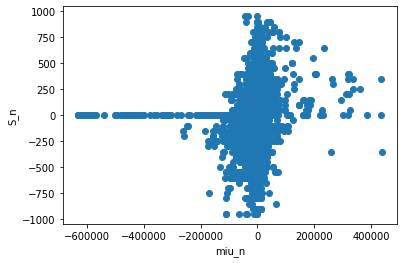

In [2058]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(miu_n_final[indexes],S_n[indexes])
plt.ylabel('S_n')
plt.xlabel('miu_n')

In [2059]:
miu_n_final

array([      0,       0,       0, ...,       0, -579500, -579500])

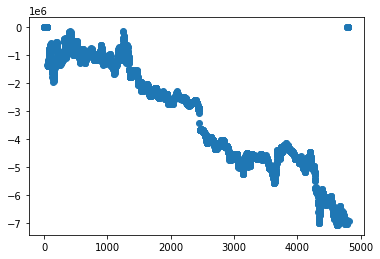

In [2060]:
(X_totmiun,Y_totmiun) = Total_miu_n.shape
range(1,Y_totmiun)
plt.scatter(range(1,Y_totmiun),Total_miu_n[0,0:Y_totmiun-1])

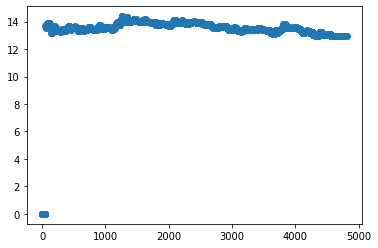

In [2061]:
(X_Price,Y_Price) = Price.shape
range(1,Y_Price)
plt.scatter(range(1,Y_Price),Price[0,0:Y_Price-1])

Text(0, 0.5, 'Price')

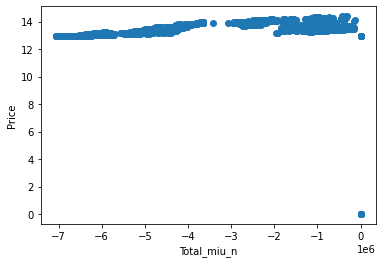

In [2062]:
plt.scatter(Total_miu_n[0,0:Y_totmiun-1],Price[0,0:Y_Price-1])
plt.xlabel('Total_miu_n')
plt.ylabel('Price')

In [2063]:
import numpy as np
Price_change = np.zeros(Price.shape)
Total_miu_n_change = np.zeros(Total_miu_n.shape)
# Price_change[0,1:Y_Price-1] = Price[0,1:Y_Price-1] - Price[0,0:Y_Price-2]

DIST_TOTALMIU = 1
for i in range(DIST_TOTALMIU,Y_Price-1): 
    Total_miu_n_change[0,i] = Total_miu_n[0,i] - Total_miu_n[0,i-DIST_TOTALMIU]
for i in range(1,DIST_TOTALMIU-1):
    Total_miu_n_change[0,i] = Total_miu_n[0,i]

DIST_PRICE = 5
for i in range(DIST_PRICE,Y_Price-1): 
    Price_change[0,i] = Price[0,i] - Price[0,i-DIST_PRICE]
    if Price_change[0,i] > 1:  #强行删去一个很偏离的点
        Price_change[0,i] = 0
for i in range(1,DIST_PRICE-1):
    Price_change[0,i] = Price[0,i]


Text(0, 0.5, 'Price_change')

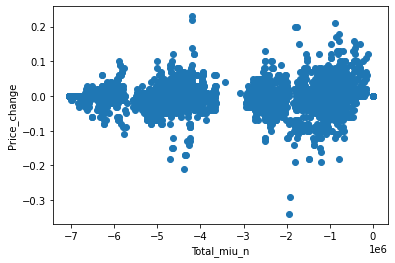

In [2064]:
plt.scatter(Total_miu_n[0,0:Y_totmiun-1],Price_change[0,0:Y_Price-1])
plt.xlabel('Total_miu_n')
plt.ylabel('Price_change')

C:\Users\86157\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Text(0, 0.5, 'Price_change')

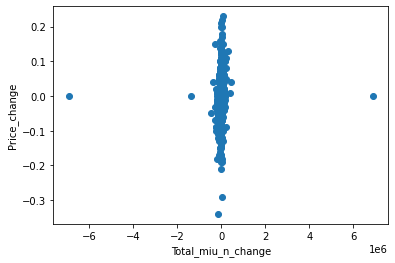

In [2065]:
plt.scatter(Total_miu_n_change[0,0:Y_totmiun-1],Price_change[0,0:Y_Price-1])
plt.xlabel('Total_miu_n_change')
plt.ylabel('Price_change')

Text(0, 0.5, 'Price_change')

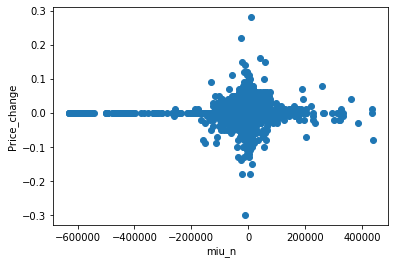

In [2066]:
import numpy as np
Price_change = np.zeros(Price.shape)
# Price_change[0,1:Y_Price-1] = Price[0,1:Y_Price-1] - Price[0,0:Y_Price-2]
for i in range(1,Y_Price-1): 
    Price_change[0,i] = Price[0,i] - Price[0,i-1]
    if Price_change[0,i] > 1:  #强行删去一个很偏离的点
        Price_change[0,i] = 0
Price_change[0,0] = Price[0,0]
plt.scatter(miu_n_final[0:Y_totmiun-1],Price_change[0,0:Y_Price-1])
plt.xlabel('miu_n')
plt.ylabel('Price_change')


In [2067]:
from sklearn.model_selection import train_test_split

# temp1 =  np.arange(1,Y_totmiun).reshape(1,Y_totmiun-1)#转为1*Y_totmiun-1的矩阵，以使得shape和Total_miu_n匹配
# temp2 =  np.arange(1,Y_totmiun).reshape(1,Y_totmiun-1)#但这种方式不被train_test_split接受，它要求两个都是数组而不是矩阵
# X_train,X_test,Y_train,Y_test = train_test_split(temp1[0,0:Y_totmiun-1],temp2[0,0:Y_totmiun-1])

X_train,X_test,Y_train,Y_test = train_test_split(Total_miu_n_change[0,0:Y_totmiun-1],Price_change[0,0:Y_Price-1]) #默认的分割是3：1
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(3605,)
(1202,)
(3605,)
(1202,)


In [2068]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
model.score(X_test.reshape(-1, 1),Y_test.reshape(-1, 1))


a=model.intercept_#截距
b=model.coef_#回归系数

print(a)
print(b)


[2.17280998e-05]
[[7.43410217e-09]]
